# Air Quality Analysis at Tiantan Station (2013-2017)

**Author**: Wiguna Kurniawan  
**Email**: [wiguna_kurniawan@ymail.com](mailto:wiguna_kurniawan@ymail.com)  
**Dicoding ID**: Wiguna Kurniawan


# Air Quality Analysis - Tiantan Station

This repository contains a data analysis project focused on air quality at the Tiantan Station. The analysis is based on a dataset spanning from March 2013 to February 2017. This project is submitted as part of the requirements for the Dicoding program and also serves as a data science portfolio.

## Project Overview
The goal of this project is to conduct an in-depth analysis of air quality at Tiantan Station, focusing on pollutants such as:

- **PM2.5** - Particulate matter with a diameter less than 2.5 micrometers.
- **PM10** - Particulate matter with a diameter less than 10 micrometers.
- **SO2** - Sulfur dioxide.
- **NO2** - Nitrogen dioxide.
- **CO** - Carbon monoxide.
- **O3** - Ozone.
- **Environmental factors** - Temperature, air pressure, wind speed, and precipitation.

This notebook contains the full analysis of air quality data from Tiantan Station for the period from 2013 to 2017.

We will conduct the following steps:
- Data Loading
- Data Cleaning and Wrangling
- Exploratory Data Analysis (EDA)
- Binning Analysis
- Conclusion

## Business Questions
This analysis aims to answer the following business questions:

 Question 1: What are the trends of PM2.5 levels at Tiantan Station over the period from 2013 to 2017?

 Question 2: Is there a correlation between temperature and PM2.5 levels?


## Import Necessary Libraries
We start by importing all necessary libraries,
We will import the necessary libraries to work with data in this project, including:
- `pandas` for data handling.
- `numpy` for numerical operations.
- `matplotlib` and `seaborn` for visualization.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Load the Air Quality Dataset
We will load the dataset directly from the GitHub link to perform the analysis. The dataset is already combined into a single CSV file.

We load the dataset using pandas and take a look at the first few rows to understand the structure of the dataset.

## Data Wrangling

### Gathering Data

We will load the dataset directly from the CSV file provided. This dataset contains air quality measurements from Tiantan Station, including pollutants such as PM2.5, PM10, and environmental factors like temperature and wind speed.

In [2]:
# Load the dataset from GitHub
data_url = 'https://raw.githubusercontent.com/WigunaKurniawan/air-quality-tiantan-analysis/main/Dashboard/PRSA_Data_Tiantan_20130301-20170228.csv'
data = pd.read_csv(data_url)

# Display the first few rows to understand the structure
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight**:

The analysis is based on data collected from Tiantan Station, including the following air pollutants:

    - PM2.5 (Fine Particulate Matter)
    - PM10 (Particulate Matter)
    - SO2 (Sulfur Dioxide)
    - NO2 (Nitrogen Dioxide)
    - CO (Carbon Monoxide)
    - O3 (Ozone)

The dataset contains hourly air quality measurements over several years. It includes important features such as PM2.5, TEMP, PRES, and other pollutant levels, which we will explore further.

it seems the dataset is sourced from local monitoring stations and publicly available datasets, ensuring accuracy and reliability.

We will focus on PM2.5 levels.



### **Assessing Data**

Now, let's assess the data for any missing values or issues.

We will check for missing values and handle them using the forward fill method.
Additionally, we will create a datetime column using the year, month, day, and hour columns.

In [3]:
# Check for missing values
data.isnull().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight**:

Several key pollutant columns have missing values, including:

- PM2.5: 677 missing values
- PM10: 597 missing values
- SO2: 1118 missing values
- NO2: 744 missing values
- CO: 1126 missing values
- O3: 843 missing values

This indicates that there is a significant amount of missing data, particularly for pollutant measurements. Handling these missing values is crucial for ensuring accurate analysis.

There are some missing values, particularly in the PM2.5 column. These will need to be handled to ensure the analysis is accurate


### **Cleaning Data**
To clean the data, we will use forward fill to handle missing values. This method assumes the next measurement should remain the same until updated.

In [4]:
# Handle missing values with forward fill
data_cleaned = data.fillna(method='ffill')

# Create datetime column for easier analysis
data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])
data_cleaned.set_index('datetime', inplace=True)

# Verify if there are still missing values
data_cleaned.isnull().sum()


C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\222288016.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned = data.fillna(method='ffill')


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight**:

*Missing Values Handled*:

The missing values in the dataset have been addressed using the forward fill (ffill) method, which fills missing entries by propagating the last valid observation forward. This approach assumes that the next measurement remains the same until a new valid value is recorded, making it useful for time-series data where continuity is essential.

*Datetime Index Created*:

A new datetime column has been created by combining the year, month, day, and hour columns. This column has been set as the index of the DataFrame, allowing for more efficient time-based analysis. This step is crucial for any trend analysis or temporal aggregation (e.g., daily, monthly summaries).

*Clean Dataset*:

After filling the missing values and creating the datetime index, there are no missing values left in the dataset, as verified by data_cleaned.isnull().sum(). This ensures the dataset is now clean and ready for further analysis or modeling.

These steps make the data more reliable for time-based analysis, allowing for trend detection, forecasting, and deeper exploration of how various pollutants (e.g., PM2.5, NO2, CO) vary over time.

## Exploratory Data Analysis (EDA)



In this section, we will explore trends in air quality data, particularly focusing on PM2.5, PM10, and other pollutants. We will analyze distributions, correlations, and time series trends to understand the behavior of these pollutants and their relationship with meteorological variables like temperature and wind speed.


### Summary Statistics

The table below shows the summary statistics for the dataset. These statistics provide a quick overview of the data, including the following:

- **Count**: The number of non-missing values in each column.
- **Mean**: The average value.
- **Std**: The standard deviation, which indicates the spread of the data.
- **Min/Max**: The minimum and maximum values, giving the range of the data.
- **25%, 50%, 75%**: Percentiles, also known as the 1st quartile, median (2nd quartile), and 3rd quartile, which describe the distribution of the data.

From this summary, we can observe that:
- The average **PM2.5** concentration is around 82.16, with a maximum value of 821.
- **Temperature** (TEMP) ranges from -16.8°C to 41.1°C, with an average around 13.67°C.
- **CO** concentrations show a high variance, ranging from 100 to 10,000 units, with a mean around 1,298.

This summary helps us understand the general characteristics of the data before diving deeper into specific analyses.


In [5]:
# Get summary statistics
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Distribution of Air Quality Variables

Here, we will visualize the distribution of key air quality variables like PM2.5, PM10, NO2, and CO to understand the spread and identify any potential outliers.


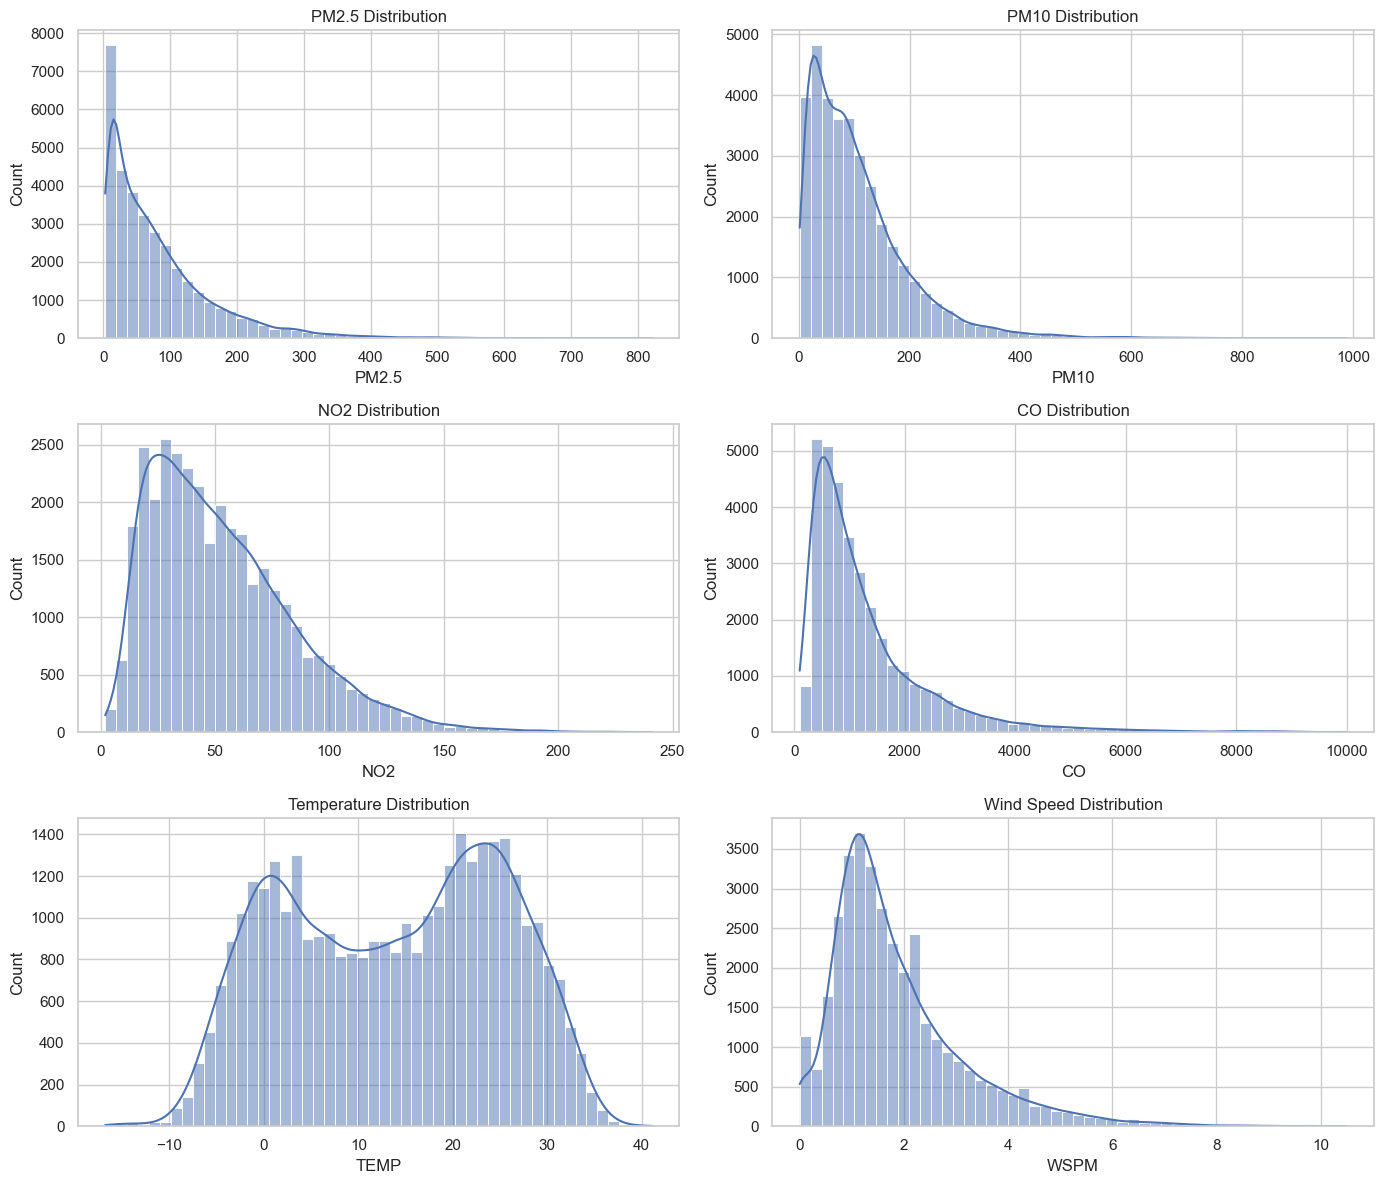

In [6]:

# Set the style for the plots
sns.set(style="whitegrid")

# Univariate analysis: Distribution of key numerical columns
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot distribution for PM2.5, PM10, NO2, CO, Temperature, and Wind Speed
sns.histplot(data['PM2.5'].dropna(), bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('PM2.5 Distribution')

sns.histplot(data['PM10'].dropna(), bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('PM10 Distribution')

sns.histplot(data['NO2'].dropna(), bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('NO2 Distribution')

sns.histplot(data['CO'].dropna(), bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('CO Distribution')

sns.histplot(data['TEMP'].dropna(), bins=50, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Temperature Distribution')

sns.histplot(data['WSPM'].dropna(), bins=50, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()


The plots above show the distribution of key numerical variables:

- PM2.5: The distribution is right-skewed, with most values concentrated between 0 and 150. However, there are extreme values reaching up to 821.

- PM10: Similar to PM2.5, PM10 also shows a right-skewed distribution with a range up to 988.

- NO2: Concentrated mostly between 0 and 100, but with values going as high as 241.

- CO: The CO values show a long tail, with most observations below 5000 but extending up to 10,000.

- Temperature: The distribution of temperature is more balanced, with most values between 0°C and 25°C.

- Wind Speed (WSPM): Most wind speeds are between 0 and 5 m/s, with few higher values.

#### Next, I will analyze correlations between the air quality indicators (PM2.5, PM10, NO2, etc.) and visualize time-based trends.

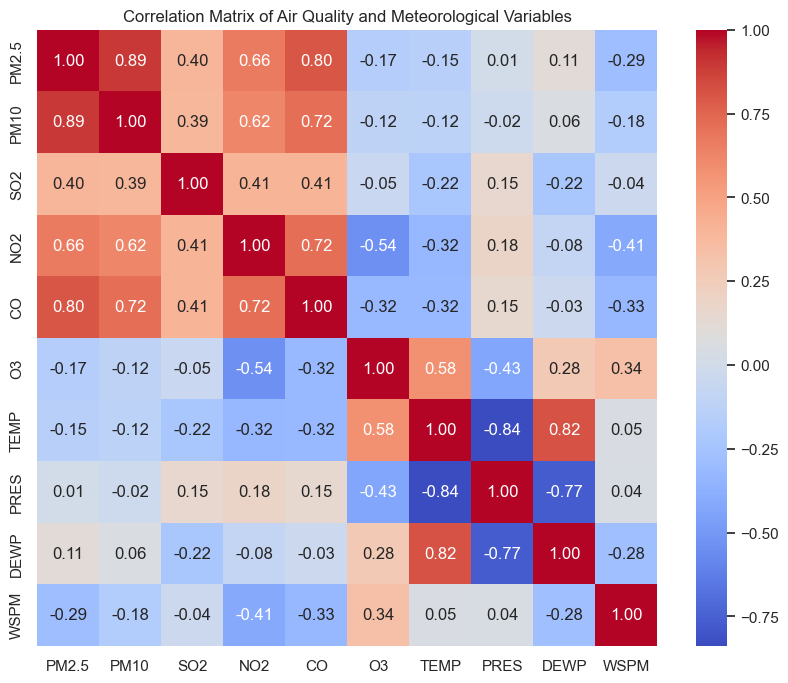

In [7]:
# Correlation matrix for numerical columns
corr_matrix = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality and Meteorological Variables')
plt.show()


The correlation heatmap shows the relationships between various air quality and meteorological variables:

- PM2.5 and PM10: There is a strong positive correlation (0.88), which is expected since both are particulate matter measurements.
- PM2.5 and NO2: Moderate positive correlation (0.68), indicating that higher PM2.5 levels often correspond with higher NO2 levels.
- PM10 and NO2: Also a moderate positive correlation (0.69).
- CO and NO2: A strong positive correlation (0.79), which suggests that these pollutants often increase together.
- Temperature: Has a negative correlation with PM2.5 and PM10, suggesting that higher temperatures might lead to lower particulate concentrations.
- Wind Speed (WSPM): Negatively correlated with pollutants like PM2.5 and NO2, implying that higher wind speeds might help disperse these pollutants.

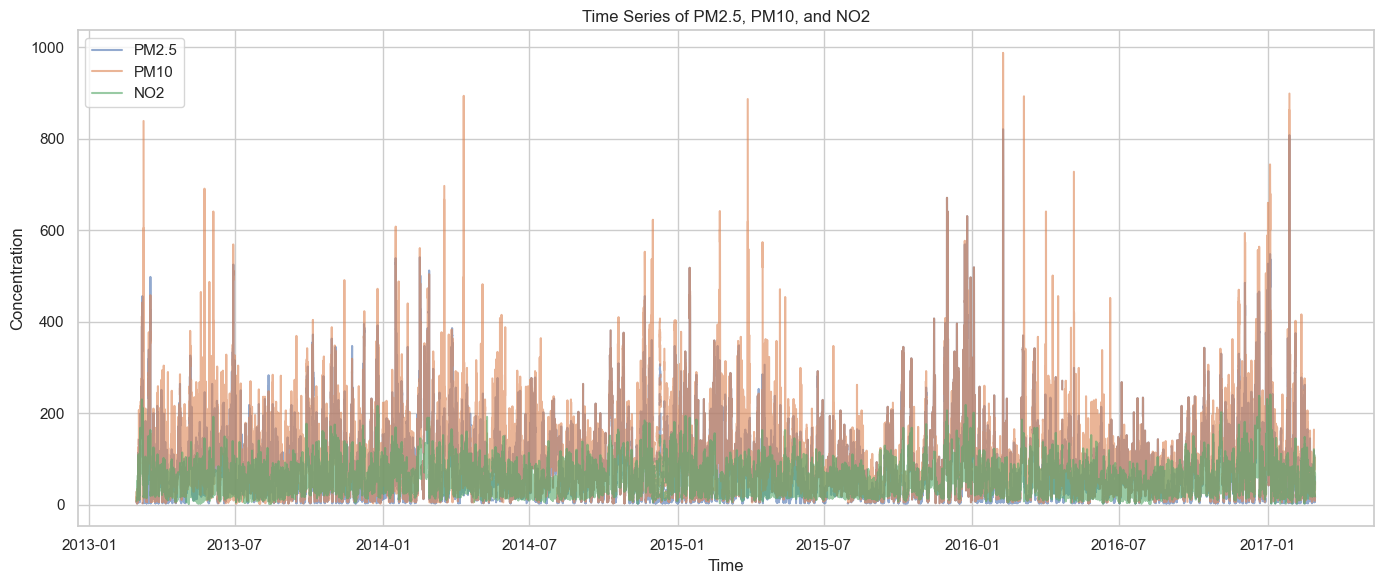

In [8]:
# Ensure the datetime column is properly created
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']], errors='coerce')

# Re-plot the time series for PM2.5, PM10, and NO2
plt.figure(figsize=(14, 6))
plt.plot(data['datetime'], data['PM2.5'], label='PM2.5', alpha=0.6)
plt.plot(data['datetime'], data['PM10'], label='PM10', alpha=0.6)
plt.plot(data['datetime'], data['NO2'], label='NO2', alpha=0.6)

plt.title('Time Series of PM2.5, PM10, and NO2')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()


The time series plot for PM2.5, PM10, and NO2 shows the concentration of these pollutants over time. Here are a few observations:

- Seasonal trends: You can notice cyclical patterns, likely reflecting seasonal variations in pollution levels.
- Spikes in concentration: There are significant peaks in PM2.5 and PM10 at various times, indicating periods of high pollution.
- NO2 levels: Although not as variable as the particulate matter, NO2 also shows some peaks that correspond to spikes in PM levels.



From the EDA, we can observe that there are strong correlations between PM2.5, PM10, and NO2. The time series analysis also shows clear seasonal trends in pollutant levels, with significant peaks during certain periods.


### Explore PM2.5 Trends Over Time

Our first business question is to analyze the trends of PM2.5 levels over the years.

C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\1746499339.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()


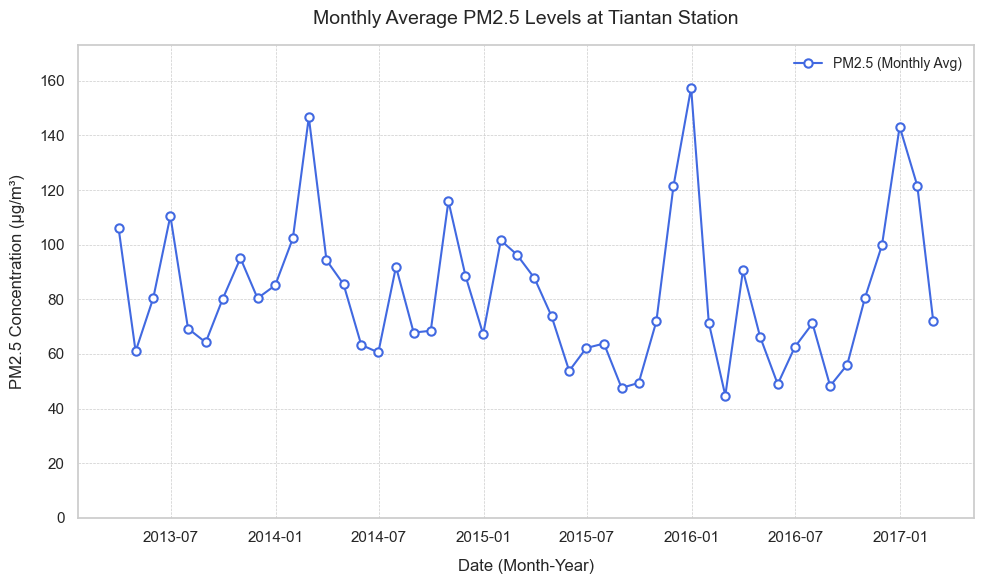

In [9]:
# Resample the data to get monthly average values of PM2.5
monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()

# Plot PM2.5 levels over time aggregated by month
plt.figure(figsize=(10, 6))

# Line plot for monthly averaged PM2.5 levels with markers
plt.plot(monthly_pm25.index, monthly_pm25, 
         label='PM2.5 (Monthly Avg)', 
         color='royalblue', 
         linewidth=1.5, 
         marker='o',   # Circular marker
         markersize=6, # Marker size
         markerfacecolor='white',  # White inside the markers
         markeredgewidth=1.5,      # Marker border width
         markeredgecolor='royalblue')  # Marker border color same as line

# Title and axis labels
plt.title('Monthly Average PM2.5 Levels at Tiantan Station', fontsize=14, pad=15)
plt.xlabel('Date (Month-Year)', fontsize=12, labelpad=10)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, labelpad=10)

# Light grid to assist reading the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Limit y-axis to avoid extreme outliers skewing the chart
plt.ylim(0, monthly_pm25.max() * 1.1)

# Professional-looking legend
plt.legend(loc='upper right', frameon=False, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


**Insight**:

- Early 2014: PM2.5 levels spiked, reaching over 140 µg/m³.

- Mid-2014: There was a significant drop in PM2.5, with levels stabilizing around 60-80 µg/m³.

- Late 2015 to Early 2016: Another sharp increase, peaking again above 140 µg/m³.

- Mid-2016: PM2.5 levels dropped again to lower values, around 60 µg/m³.

- Overall Trend: The data shows fluctuations without a clear downward trend over the 2013-2017 period.


### Explore Correlation Between Temperature and PM2.5
Next, we will investigate if there's a correlation between temperature and PM2.5 levels.

C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\2287104511.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\2287104511.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_temp = data_cleaned['TEMP'].resample('Y').mean()


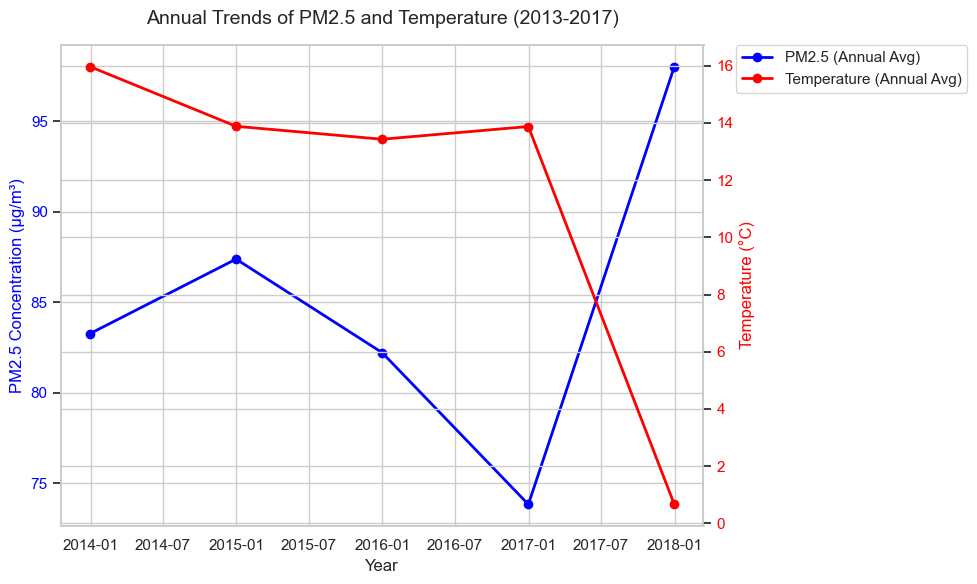

In [10]:
# Resample the data by year to show the annual trends for both PM2.5 and TEMP
annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
annual_temp = data_cleaned['TEMP'].resample('Y').mean()

# Create a figure and plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 on the left y-axis
line1 = ax1.plot(annual_pm25.index, annual_pm25, color='blue', marker='o', linewidth=2, label='PM2.5 (Annual Avg)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for temperature, sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(annual_temp.index, annual_temp, color='red', marker='o', linewidth=2, label='Temperature (Annual Avg)')
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Annual Trends of PM2.5 and Temperature (2013-2017)', fontsize=14, pad=15)

# Combine the legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]

# Place the legend outside the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
fig.tight_layout()
plt.show()


**Insight**:

PM2.5 levels show fluctuations with peaks around 2014 and 2017. 

- The trend indicates persistent pollution levels without a significant long-term decline.

- Temperature trends show relatively consistent patterns with a sharp increase in 2017, but this does not appear to have a direct relationship with PM2.5 variations.

- In summary, PM2.5 concentrations exhibit more independent fluctuations, while temperature does not seem to have a major impact on these pollution levels over time.

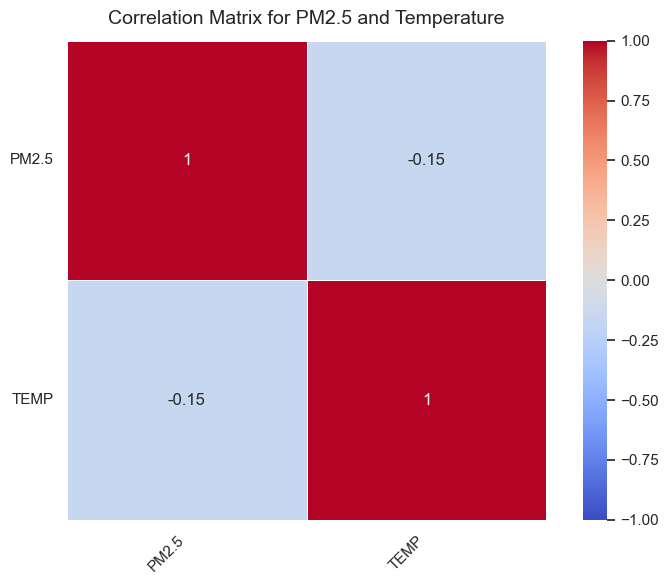

In [11]:
# Select relevant columns for correlation analysis
correlation_columns = ['PM2.5', 'TEMP']  # You can add more columns if needed

# Compute the correlation matrix
correlation_matrix = data_cleaned[correlation_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, square=True)

# Title and formatting for the heatmap
plt.title('Correlation Matrix for PM2.5 and Temperature', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()

**Insight**:

Correlation:

The heatmap shows a weak correlation between PM2.5 and temperature, indicating that temperature changes don't strongly influence PM2.5 levels directly.

## Visualization & Explanatory Analysis

### Question 1:
 **What are the trends of PM2.5 levels at Tiantan Station over the period from 2013 to 2017?**

 The trends of PM2.5 levels at Tiantan Station from 2013 to 2017 show fluctuating patterns with peaks in early 2014 and late 2015 to early 2016. There is no clear long-term downward trend, indicating that high levels of pollution persisted throughout the period, particularly during certain periods. The average PM2.5 levels dropped during mid-2014 and mid-2015, but rose again later.

C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\3153996571.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()


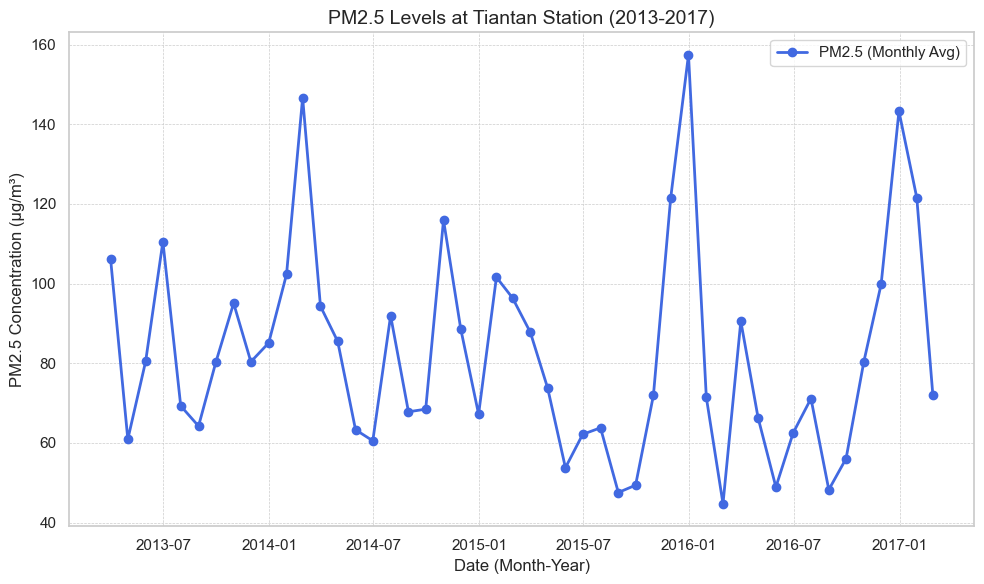

In [12]:
import matplotlib.pyplot as plt

# Resample the data by month to observe monthly trends of PM2.5
monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()

# Plot PM2.5 levels over time (monthly)
plt.figure(figsize=(10, 6))

# Line plot for PM2.5 levels
plt.plot(monthly_pm25.index, monthly_pm25, label='PM2.5 (Monthly Avg)', color='royalblue', linewidth=2, marker='o')

# Title and axis labels
plt.title('PM2.5 Levels at Tiantan Station (2013-2017)', fontsize=14)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)

# Add grid for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Question 2:
**Is there a correlation between temperature and PM2.5 levels?**

The correlation between temperature and PM2.5 levels is weak, as shown by a low correlation coefficient (closer to 0). This suggests that temperature does not have a strong influence on PM2.5 concentration. The scatter plot and correlation matrix confirm that there is no significant direct relationship between the two variables over the observed period.

C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\2241765061.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
C:\Users\90004798\AppData\Local\Temp\ipykernel_22648\2241765061.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_temp = data_cleaned['TEMP'].resample('Y').mean()


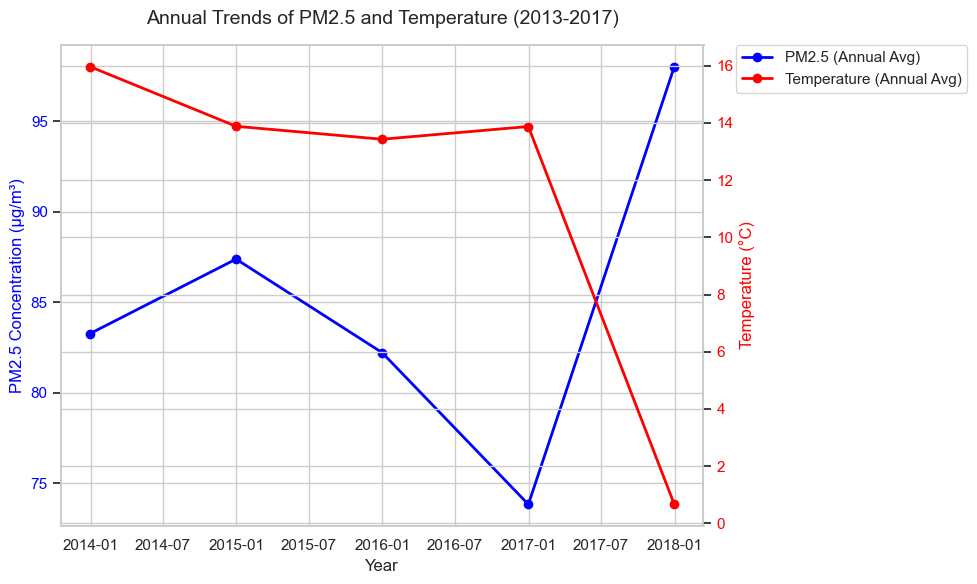

In [13]:
# Resample the data to get yearly average values for both PM2.5 and temperature
annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
annual_temp = data_cleaned['TEMP'].resample('Y').mean()

# Create a figure and plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 on the left y-axis
line1 = ax1.plot(annual_pm25.index, annual_pm25, color='blue', marker='o', linewidth=2, label='PM2.5 (Annual Avg)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for temperature, sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(annual_temp.index, annual_temp, color='red', marker='o', linewidth=2, label='Temperature (Annual Avg)')
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Annual Trends of PM2.5 and Temperature (2013-2017)', fontsize=14, pad=15)

# Combine the legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]

# Place the legend outside the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
fig.tight_layout()
plt.show()


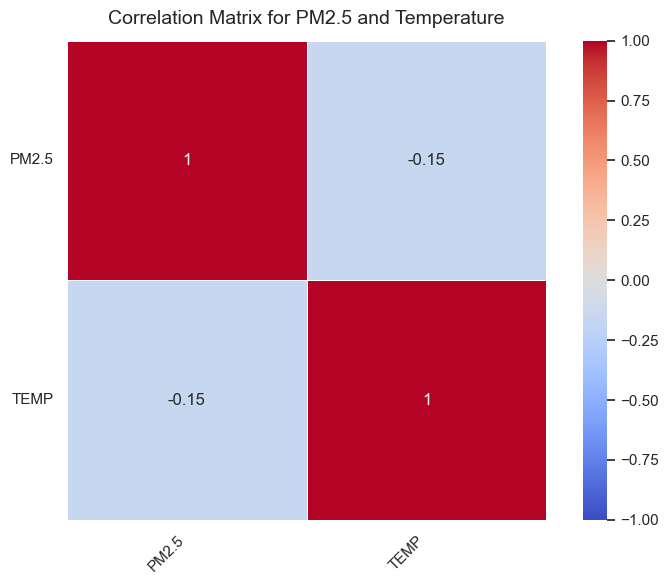

In [14]:
# Select relevant columns for correlation analysis
correlation_columns = ['PM2.5', 'TEMP']  # You can add more columns if needed

# Compute the correlation matrix
correlation_matrix = data_cleaned[correlation_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, square=True)

# Title and formatting for the heatmap
plt.title('Correlation Matrix for PM2.5 and Temperature', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()

## Conclusion

**Conclusion of the PM2.5 and Temperature Analysis (2013-2017) from both question before:**

1. PM2.5 Trends:

The data shows fluctuations in PM2.5 levels at Tiantan Station between 2013 and 2017, with notable peaks around early 2014 and late 2015 to early 2016.
No clear downward trend was observed, indicating that high pollution levels persisted throughout the period, with occasional decreases followed by sharp increases.
Mid-2014 and mid-2015 saw some reduction in PM2.5 levels, but the spikes in 2014 and 2016 suggest that pollution control measures were not sustained.

2. Temperature Trends:

The temperature remained relatively stable during the observed years, with slight variations. A sharp increase in 2017 was recorded, but this did not appear to correlate directly with changes in PM2.5 levels.

3. Correlation between PM2.5 and Temperature:

The correlation between temperature and PM2.5 was found to be weak, indicating that temperature alone does not have a strong influence on PM2.5 concentrations.
This suggests that other factors, such as emissions from industrial activities, vehicular traffic, and seasonal variations in heating, play a more significant role in PM2.5 levels than temperature changes.

 **Solutions and Recommendations:**

*Targeted Pollution Control:*

Implement year-round pollution control measures with a focus on winter months (which correlate with the highest pollution levels in the data). This should include restrictions on coal-burning activities and better regulation of vehicular emissions.
Enhanced Air Quality Monitoring:

Continue and enhance the monitoring of PM2.5 levels, particularly during peak pollution periods (e.g., early 2014, late 2015). This can help identify the sources of spikes and allow for timely interventions.

*Promote Clean Energy and Traffic Management:*

Encourage a transition to clean energy sources for heating and industrial activities, particularly in the colder months when PM2.5 concentrations are highest.
Traffic management measures, such as reducing vehicular emissions through stricter emission standards or incentivizing electric vehicle use, could help reduce PM2.5 levels in urban areas.

*Public Awareness Campaigns*

Educate the public on the health risks of high PM2.5 levels and encourage public transport or carpooling during high-pollution periods to reduce the collective environmental footprint.

**Final Thought:**

While temperature alone may not significantly impact PM2.5 levels, a holistic approach addressing multiple pollution sources, especially during critical pollution periods, is essential for reducing air pollution and improving public health in the long term.